In [1]:
%matplotlib inline

In [2]:
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Flip,
    LongestMaxSize,
    FilterInvisibleBboxes,
    Compose,
    convert_bboxes_to_albumentations,
)

In [3]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, x_max, y_max, class_idx = bbox

    img_height, img_width = img.shape[:2]
    x_min *= img_width
    x_max *= img_width
    y_min *= img_height
    y_max *= img_height
    x_min, x_max, y_min, y_max = int(x_min), int(x_max), int(y_min), int(y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    class_name = class_idx_to_name[class_idx]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
   
    return img


def visualize(img, bboxes, category_id_to_name):
    img = img.copy()
    for bbox in bboxes:
        img = visualize_bbox(img, bbox, category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [5]:
image = download_image('http://images.cocodataset.org/train2017/000000386298.jpg')

In [6]:
annotations = [
    {'bbox': [366.7, 80.84, 132.8, 181.84], 'category_id': 18},
    {'bbox': [5.66, 138.95, 147.09, 164.88], 'category_id': 17},
]
category_id_to_name = {17: 'cat', 18: 'dog'}
coco_bboxes = [ann['bbox'] + [ann['category_id']] for ann in annotations] 
bboxes = convert_bboxes_to_albumentations(image, coco_bboxes, source_format='coco')

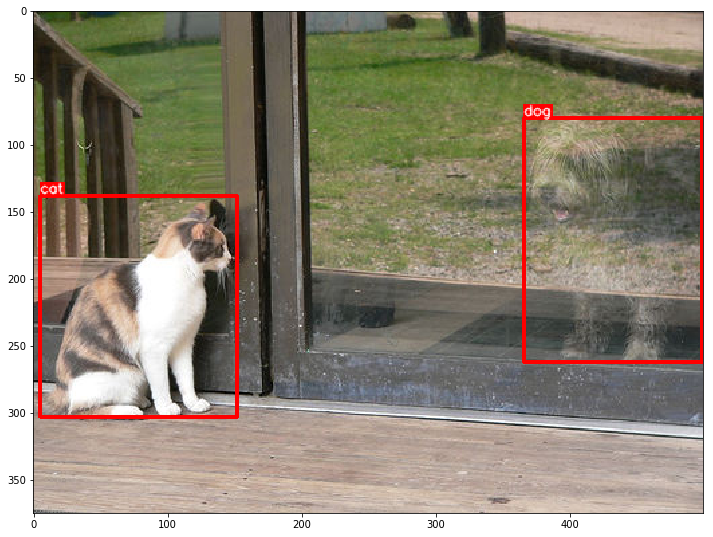

In [7]:
visualize(image, bboxes, category_id_to_name)

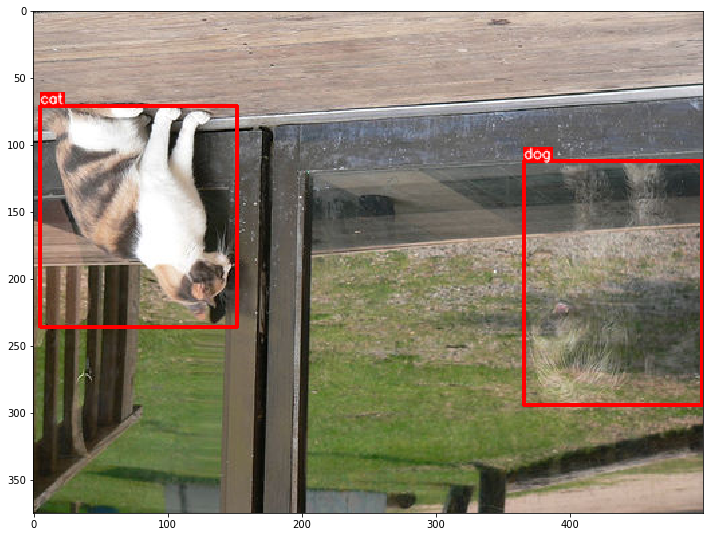

In [8]:
aug = VerticalFlip(p=1)
augmented = aug(image=image, bboxes=bboxes)
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)

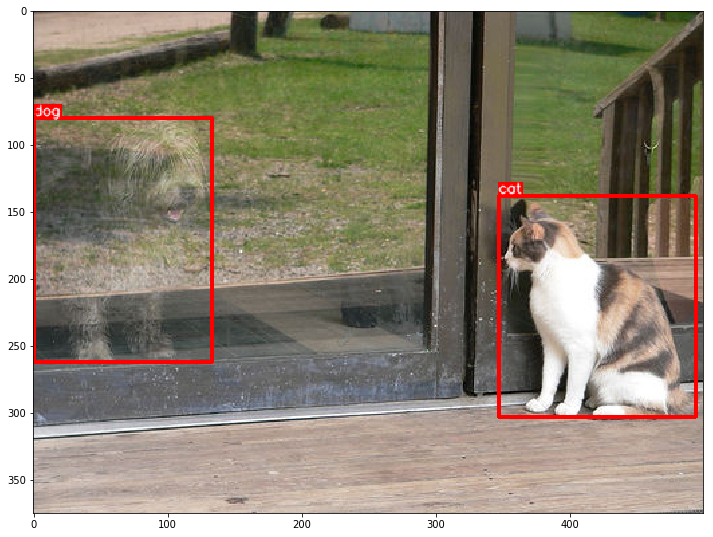

In [9]:
aug = HorizontalFlip(p=1)
augmented = aug(image=image, bboxes=bboxes)
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)

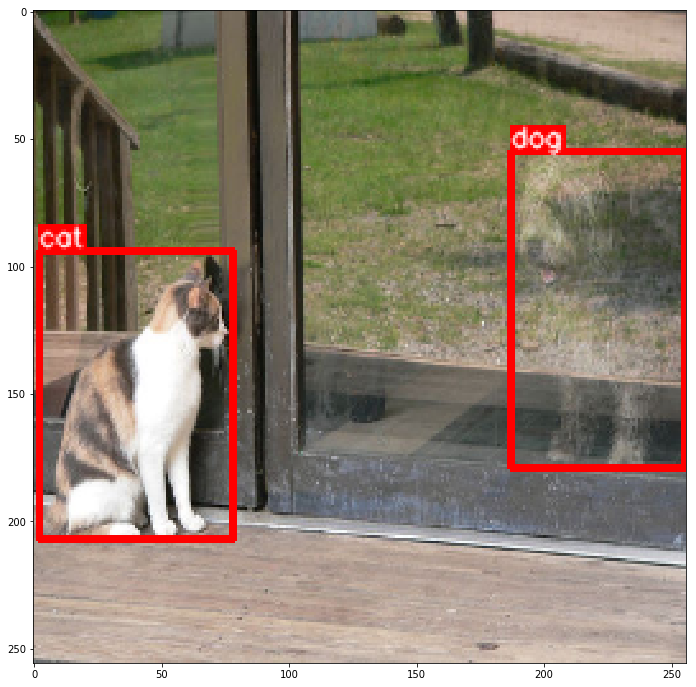

In [10]:
aug = Resize(p=1, height=256, width=256)
augmented = aug(image=image, bboxes=bboxes)
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)

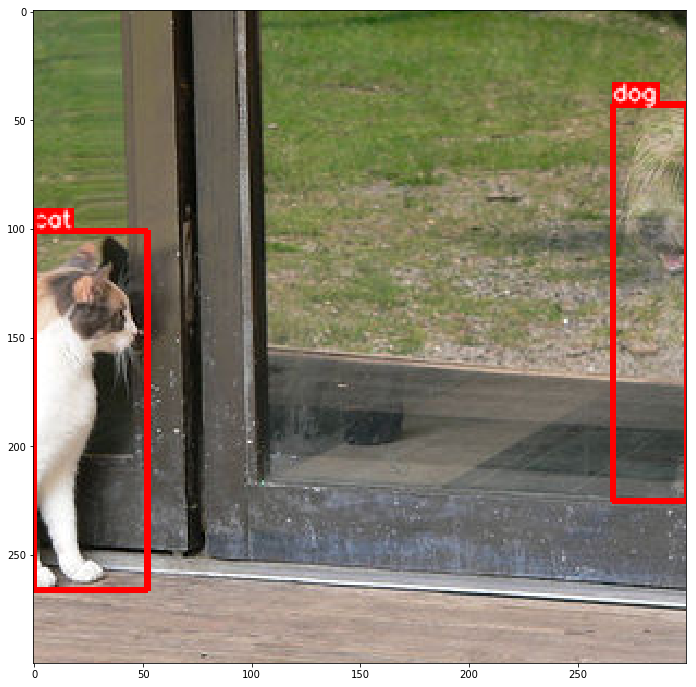

In [11]:
aug = CenterCrop(300, 300, p=1)
augmented = aug(image=image, bboxes=bboxes)
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)

Number of bboxes before augmentation: 2
Number of bboxes after augmentation: 1


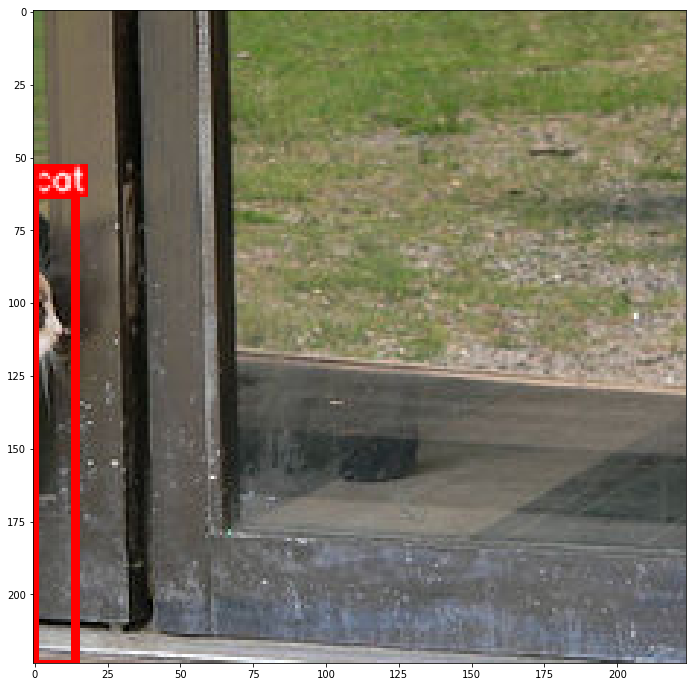

In [12]:
aug = Compose([CenterCrop(224, 224, p=1), FilterInvisibleBboxes()])
augmented = aug(image=image, bboxes=bboxes)
print('Number of bboxes before augmentation: {}'.format(len(bboxes)))
print('Number of bboxes after augmentation: {}'.format(len(augmented['bboxes'])))
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)

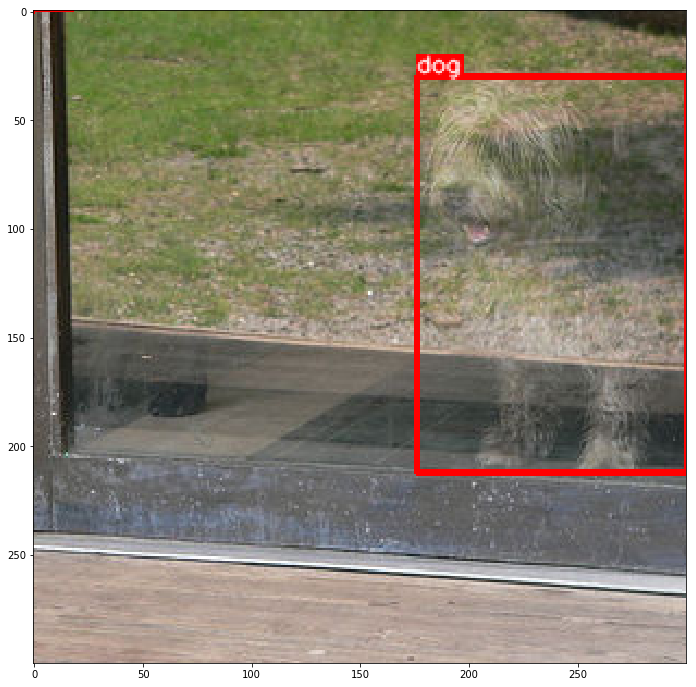

In [13]:
aug = RandomCrop(300, 300, p=1)
augmented = aug(image=image, bboxes=bboxes)
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)

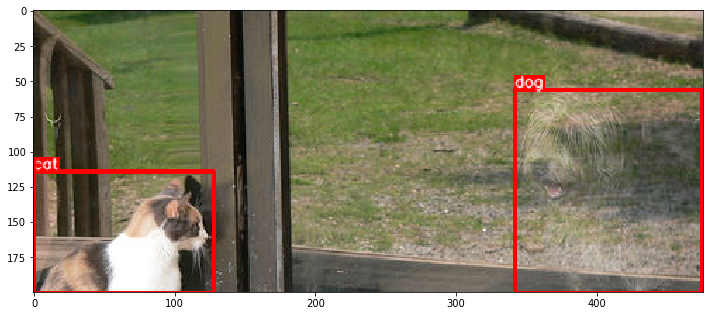

In [14]:
aug = Crop(24, 24, 500, 224, p=1)
augmented = aug(image=image, bboxes=bboxes)
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)

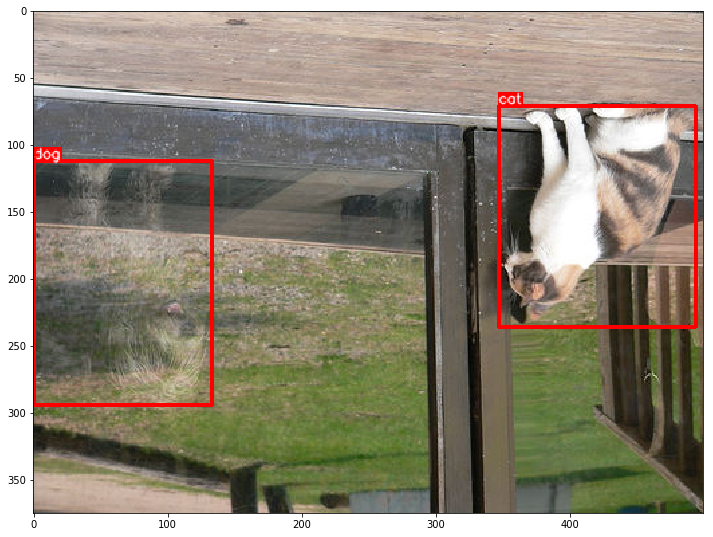

In [15]:
aug = Flip(p=1)
augmented = aug(image=image, bboxes=bboxes)
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)

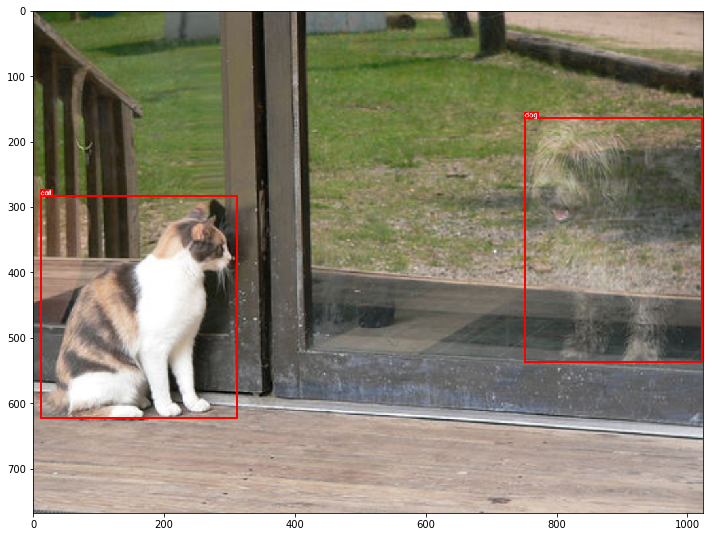

In [16]:
aug = LongestMaxSize(p=1)
augmented = aug(image=image, bboxes=bboxes)
visualize(augmented['image'], augmented['bboxes'], category_id_to_name)